## 精准率-召回率 曲线

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
y[y!=9] = 0
y[y==9] = 1

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [10]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [11]:
for th in thresholds:
    y_predict = np.array(decision_scores >= th, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

In [12]:
import matplotlib.pyplot as plt

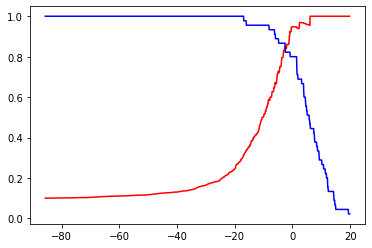

In [14]:
plt.plot(thresholds, precisions, color='red')
plt.plot(thresholds, recalls, color='blue')
plt.show()

### Precision-Recall 曲线

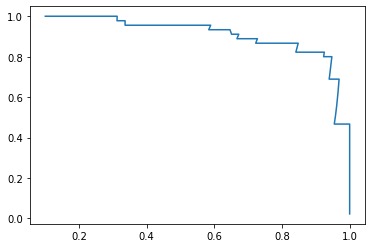

In [16]:
plt.plot(precisions, recalls)
plt.show()

In [28]:
# 在 0.85 的位置，曲线急剧下降，就是 Precision 和 Recall 的平衡点。

### sklearn 中的 Precision-Recall 曲线

In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [20]:
precisions.shape

(145,)

In [21]:
recalls.shape

(145,)

In [22]:
thresholds.shape

(144,)

In [23]:
# threshold 少一个的原因是，最后一个点对应的 precision 和 recall 分别是 1 和 0，所以没必要加进来。

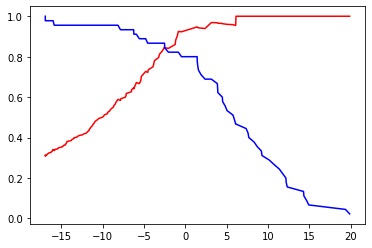

In [25]:
plt.plot(thresholds, precisions[:-1], color='red')
plt.plot(thresholds, recalls[:-1], color='blue')
plt.show()

In [26]:
# sklearn 中的 precision_recall_curve 没有从 min  到 max ，而是选取了最关键的部分。

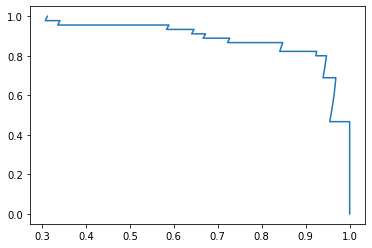

In [27]:
plt.plot(precisions, recalls)
plt.show()